In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import numpy as np

In [4]:
from util.plot_embedding import plot_embedding, plot_embedding_subplot
from util.mnist_data_loader import get_train_set, get_test_set

In [49]:
filename = 'data/set_100_mnist_spectral_size_200_500.pkl'
with open(filename, 'rb') as f:
    [all_test_data] = pickle.load(f)

In [50]:
G = all_test_data[0]

In [73]:
def oracle_mnist_embedding(labels, shuffle=False):
    means = [(0,0), (1,0), (2,0), (3,0),
             (0,1), (1,1), (2,1),
             (0,2), (1,2), (2,2),]
    means = [np.array(m) for m in means]
    
    if shuffle:
        np.random.shuffle(means)
    
    def get_num_coordinates(label):
        mean = means[label]
        cov = [[0.05, 0], [0, 0.05]]
        coord = np.random.multivariate_normal(mean, cov, 1)
        return coord

    X_emb = np.zeros((len(labels), 2))
    for i,l in enumerate(labels):
        X_emb[i,:] = get_num_coordinates(l)
    
    return X_emb

In [74]:
labels = [int(l) for l in G.labels]
X_emb = oracle_mnist_embedding(labels, shuffle=True)

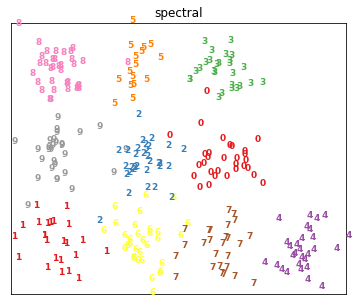

In [75]:
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(6,5))
plot_embedding_subplot(axarr, X_emb, labels=labels, title='spectral')